# Análisis exploratorio de datos

## Librerias

In [49]:
!pip install scikit-learn

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime, time
import seaborn as sns
import plotly.graph_objects as go
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Lectura de datos

In [28]:
df = pd.read_excel('./data/dieta-codorniz.xlsx')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: './data/dieta-codorniz.xlsx'

## Descripción de los Datos

In [ ]:
columns = list(df.columns)
print(columns)

['id', 'edad', 'sexo', 'estado', 'peso total', 'Oxalis', 'Quercus', 'Cyp.bulb', 'Phaseolus', 'Tephoria', 'Caracoles', 'Insectos', 'Physalis', 'Vitis.arizonica', 'Lupinus', 'Lotus.wrightii', 'Cyp.rizo', 'Commelina.dianthifolia', 'Kallstroemia.parviflora', 'Fabacea', 'Ipomoea', 'Desmodium', 'Euphorbia probably E. bilobata', 'Talinum.aurantiacum', 'SP17', 'Heterosperma.pinnatum', 'SP19', 'Desmanthus cooleyi', 'Celtis.reticulata', 'Panicum.hirticaule', 'Setaria', 'Malvacea', 'Cyperus.fendlerianus', 'SP26', 'Setaria.1', 'SP28', 'Cryptantha.cinerea', 'Sphaeralcea.fendleri', 'Hymenopappus.flavescens', 'Solaneaceae', 'Euphorbia', 'SP34', 'Piptochaetium.fimbriatum', 'Acalypha.neomexiacana', 'Fabaceae', 'Lupinus.neomexicanus', 'Mirabilis.longiflora', 'SP44', 'Prunus.virginiana', 'SP46', 'Urochloa', 'Cyperaceae', 'Pinus.edulis', 'Fabacea.1', 'SP51', 'SP52', 'Calliandra.humilis', 'Fabaceae.1', 'Solanum', 'Calliandra.eriophylla', 'Desmanthus.cooleyi', 'Sp59', 'Croton.pottsii', 'Lupinus.1', 'Polygon

**Variables:** ['id', 'edad', 'sexo', 'estado', 'peso total', 'Oxalis', 'Quercus', 'Cyp.bulb', 'Phaseolus', 'Tephoria', 'Caracoles', 'Insectos', 'Physalis', 'Vitis.arizonica', 'Lupinus', 'Lotus.wrightii', 'Cyp.rizo', 'Commelina.dianthifolia', 'Kallstroemia.parviflora', 'Fabacea', 'Ipomoea', 'Desmodium', 'Euphorbia probably E. bilobata', 'Talinum.aurantiacum', 'SP17', 'Heterosperma.pinnatum', 'SP19', 'Desmanthus cooleyi', 'Celtis.reticulata', 'Panicum.hirticaule', 'Setaria', 'Malvacea', 'Cyperus.fendlerianus', 'SP26', 'Setaria.1', 'SP28', 'Cryptantha.cinerea', 'Sphaeralcea.fendleri', 'Hymenopappus.flavescens', 'Solaneaceae', 'Euphorbia', 'SP34', 'Piptochaetium.fimbriatum', 'Acalypha.neomexiacana', 'Fabaceae', 'Lupinus.neomexicanus', 'Mirabilis.longiflora', 'SP44', 'Prunus.virginiana', 'SP46', 'Urochloa', 'Cyperaceae', 'Pinus.edulis', 'Fabacea.1', 'SP51', 'SP52', 'Calliandra.humilis', 'Fabaceae.1', 'Solanum', 'Calliandra.eriophylla', 'Desmanthus.cooleyi', 'Sp59', 'Croton.pottsii', 'Lupinus.1', 'Polygonaceae', 'Euphorbia.1', 'Calliandra', 'Solanum.1', 'SPA1', 'SPA2', 'Lotus', 'Bidens.leptocephala', 'SPA5', 'SPA6', 'Tephrosia', 'Asteraceae.Uropappus lindleyi', 'SPA9', 'SPA10', 'Ziziphus.obtisufolia', 'Aristida', 'Diodia.teres', 'Bothriochloa', 'Pinus.dulis', 'Paspalum.distichum', 'SPA17', 'SPA18', 'SPA19', 'Euphorbia.exstipulata', 'SPA21', 'Asteracea', 'SPA23', 'SPA24', 'Chilopsis.linearis', 'Sorghum.halepense', 'Amaranthus', 'Setaria nigricans', 'SPA29', 'SPA30', 'SPA31', 'SPA32', 'SPA33', 'SPA34', 'SPA35', 'SPA36', 'SPA37', 'SPA38', 'SPA39', 'SPA40', 'Agave.or.Yucca', 'SPA42', 'SPA43', 'SPA44', 'Sida', 'SPA46', 'SPA47', 'Tragia', 'Lupinus.2', 'SPA50', 'SPA51', 'SPA52', 'SPA53', 'SPA54', 'SPA55', 'Amaranthus.1', 'Desmodium.1', 'Bothriochloa.1', 'Euphorbia.2', 'SPA60', 'SPA61', 'SPA62', 'Phaseolus.1', 'SPA64', 'SPA65', 'Arachnida', 'Juniperus prob. deppeana', 'time', 'covey', 'dist camino', 'ppanual17', 'tmedia17', 'altitud', 'lat', 'lon', 'hcrop', 'hland', 'gap']

In [ ]:
df.describe()

,peso total,Oxalis,Quercus,Cyp.bulb,Phaseolus,Tephoria,Caracoles,Insectos,Physalis,Vitis.arizonica,...,time,covey,dist camino,ppanual17,tmedia17,altitud,lat,lon,hcrop,hland
count,319.000000,319.000000,318.000000,317.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,...,232.000000,190.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,319.000000,220.000000
mean,2.084231,0.097181,0.391575,0.194748,0.319146,0.014456,0.000230,0.113014,0.035234,0.008553,...,1327.995690,9.178947,207.466742,436.755656,13.860351,1709.475113,32.221751,-108.935298,0.645314,1.044265
std,1.718818,0.681455,0.873040,0.626539,1.021837,0.054934,0.002218,0.384408,0.303878,0.094990,...,227.468822,3.779586,178.331358,78.965781,2.093009,224.818989,0.815692,1.534481,0.528932,0.360545
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,835.000000,1.000000,6.400000,235.000000,7.054167,1206.000000,31.343850,-111.072099,0.000000,0.222691
25%,0.704350,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1130.000000,6.000000,81.820000,376.000000,12.379167,1567.000000,31.479233,-110.585248,0.181204,0.783493
50%,1.776000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1365.000000,10.000000,171.920000,422.000000,14.354167,1658.000000,31.791366,-108.940734,0.579030,1.057318
75%,3.001150,0.000000,0.134650,0.000000,0.091750,0.000000,0.000000,0.030000,0.000000,0.000000,...,1530.000000,12.000000,272.860000,518.000000,15.537500,1901.000000,32.894714,-107.723281,0.963353,1.362937
max,9.758400,9.758400,4.382100,6.723300,7.326500,0.666200,0.027800,2.900000,4.471900,1.666400,...,1700.000000,20.000000,774.840000,620.000000,17.312500,2518.000000,34.037969,-105.354701,2.318525,1.796301


### Duplicado de datos

In [ ]:
# Verifica si existen registros duplicados
df.duplicated().value_counts()

False    319
Name: count, dtype: int64

### Datos Faltantes

In [ ]:
# Verificar si hay datos faltantes o nulos en cada columna
missing_data = df.isnull().sum()

# Filtrar las columnas que tienen datos faltantes
missing_columns = missing_data[missing_data > 0]

# Mostrar el número de valores faltantes por columna
print(missing_columns)

# Verificar si hay alguna columna con datos faltantes
has_missing_data = missing_data.any()

edad               87
sexo               42
Quercus             1
Cyp.bulb            2
Lotus.wrightii      1
Fabacea             1
SP34                1
SPA33               1
SPA55               2
Bothriochloa.1      1
time               87
covey             129
dist camino        98
ppanual17          98
tmedia17           98
altitud            98
lat                98
lon                98
hland              99
gap                98
dtype: int64


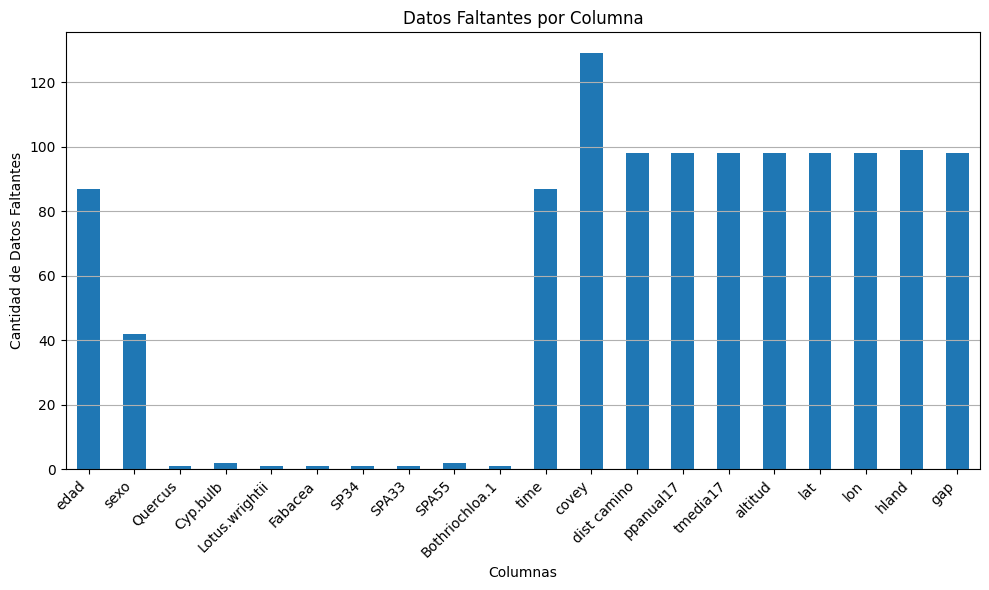

In [29]:
# Graficar los datos faltantes por columna
missing_columns.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Columnas')
plt.ylabel('Cantidad de Datos Faltantes')
plt.title('Datos Faltantes por Columna')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

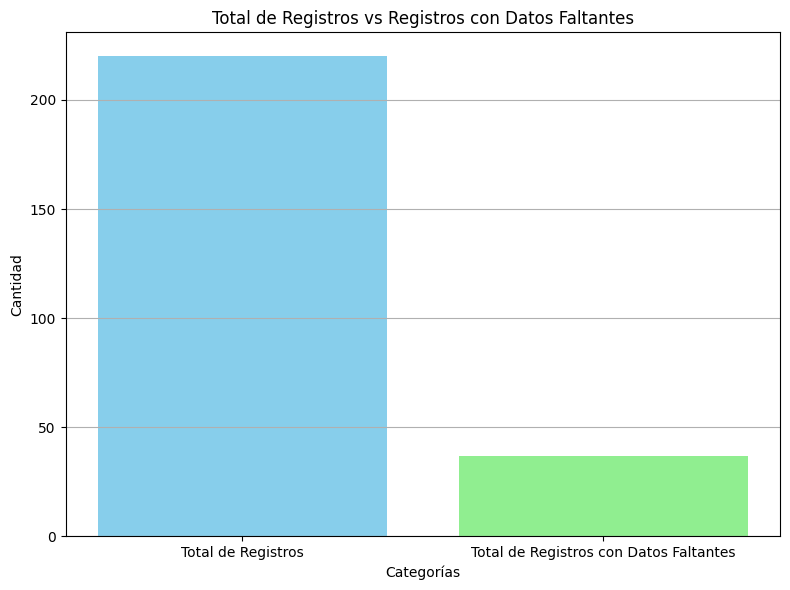

Total de Datos Faltantes: 220
Total de Registros con Datos Nulos: 37


In [30]:
# Calcular el total de datos faltantes en todo el DataFrame
total_faltantes = df.shape[0]

# Contar la cantidad de registros que tienen al menos un dato nulo en alguna columna
registros_con_nulos = df[df.isnull().any(axis=1)].shape[0]

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(['Total de Registros', 'Total de Registros con Datos Faltantes'], [total_faltantes, registros_con_nulos], color=['skyblue', 'lightgreen'])
plt.xlabel('Categorías')
plt.ylabel('Cantidad')
plt.title('Total de Registros vs Registros con Datos Faltantes')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Mostrar el total de datos faltantes y la cantidad de registros con datos nulos
print(f'Total de Datos Faltantes: {total_faltantes}')
print(f'Total de Registros con Datos Nulos: {registros_con_nulos}')


In [31]:
# Eliminar registros con datos nulos en la columna 'hland'
df = df.dropna(subset=['hland'])

# Verificar el tamaño del DataFrame después de eliminar los registros
print("Tamaño del DataFrame después de eliminar registros con datos nulos en 'hland':", df.shape)

Tamaño del DataFrame después de eliminar registros con datos nulos en 'hland': (220, 146)


### Elementos en la dieta de la codorniz

In [32]:
print(columns[5:-11])

['Oxalis', 'Quercus', 'Cyp.bulb', 'Phaseolus', 'Tephoria', 'Caracoles', 'Insectos', 'Physalis', 'Vitis.arizonica', 'Lupinus', 'Lotus.wrightii', 'Cyp.rizo', 'Commelina.dianthifolia', 'Kallstroemia.parviflora', 'Fabacea', 'Ipomoea', 'Desmodium', 'Euphorbia probably E. bilobata', 'Talinum.aurantiacum', 'SP17', 'Heterosperma.pinnatum', 'SP19', 'Desmanthus cooleyi', 'Celtis.reticulata', 'Panicum.hirticaule', 'Setaria', 'Malvacea', 'Cyperus.fendlerianus', 'SP26', 'Setaria.1', 'SP28', 'Cryptantha.cinerea', 'Sphaeralcea.fendleri', 'Hymenopappus.flavescens', 'Solaneaceae', 'Euphorbia', 'SP34', 'Piptochaetium.fimbriatum', 'Acalypha.neomexiacana', 'Fabaceae', 'Lupinus.neomexicanus', 'Mirabilis.longiflora', 'SP44', 'Prunus.virginiana', 'SP46', 'Urochloa', 'Cyperaceae', 'Pinus.edulis', 'Fabacea.1', 'SP51', 'SP52', 'Calliandra.humilis', 'Fabaceae.1', 'Solanum', 'Calliandra.eriophylla', 'Desmanthus.cooleyi', 'Sp59', 'Croton.pottsii', 'Lupinus.1', 'Polygonaceae', 'Euphorbia.1', 'Calliandra', 'Solanum.

In [33]:
# Crear un nuevo DataFrame con las columnas especificadas
df_dieta = df[columns[5:-11]].copy()
df_dieta.head()

,Oxalis,Quercus,Cyp.bulb,Phaseolus,Tephoria,Caracoles,Insectos,Physalis,Vitis.arizonica,Lupinus,...,Bothriochloa.1,Euphorbia.2,SPA60,SPA61,SPA62,Phaseolus.1,SPA64,SPA65,Arachnida,Juniperus prob. deppeana
0,9.7584,0.0,0.000,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.9632,0.0,0.000,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.8238,0.0,0.000,0.6148,0.0726,0.0,0.0514,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.7076,0.0,0.000,0.0000,0.0000,0.0,0.7900,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.2011,0.0,0.778,0.3908,0.0000,0.0,0.0027,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
df_dieta.describe()

,Oxalis,Quercus,Cyp.bulb,Phaseolus,Tephoria,Caracoles,Insectos,Physalis,Vitis.arizonica,Lupinus,...,Bothriochloa.1,Euphorbia.2,SPA60,SPA61,SPA62,Phaseolus.1,SPA64,SPA65,Arachnida,Juniperus prob. deppeana
count,220.000000,219.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.0,220.0,220.0,220.0,220.0,220.0,220.0,220.0,220.000000,220.0
mean,0.135306,0.184113,0.260930,0.398215,0.014997,0.000109,0.108142,0.048888,0.011067,0.000157,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000700,0.0
std,0.817760,0.607006,0.737829,1.199566,0.063786,0.001246,0.385100,0.364621,0.113797,0.002326,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010383,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
75%,0.000000,0.000000,0.000000,0.057800,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
max,9.758400,3.620800,6.723300,7.326500,0.666200,0.018000,2.900000,4.471900,1.666400,0.034500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.154000,0.0


### Variables Climatologicas y del individuo

In [35]:
print(columns[:5] + columns[-11:])

['id', 'edad', 'sexo', 'estado', 'peso total', 'time', 'covey', 'dist camino', 'ppanual17', 'tmedia17', 'altitud', 'lat', 'lon', 'hcrop', 'hland', 'gap']


In [36]:
# Crear una lista con las columnas 
nuevas_columnas = columns[:5] + columns[-11:]

# Crear un nuevo DataFrame con las columnas especificadas
df_all = df[nuevas_columnas].copy()

In [37]:
df_all.head()

,id,edad,sexo,estado,peso total,time,covey,dist camino,ppanual17,tmedia17,altitud,lat,lon,hcrop,hland,gap
0,2014-104,J,Female,NM,9.7584,1420.0,6.0,251.86,462.0,7.054167,2518.0,34.037969,-108.963777,0.000000,0.798600,Rocky Mountain Ponderosa Pine Woodland
1,2014-105,J,Male,NM,3.9632,1420.0,6.0,251.86,462.0,7.054167,2518.0,34.037969,-108.963777,0.000000,0.798600,Rocky Mountain Ponderosa Pine Woodland
2,2016-133,A,Female,AZ,5.4562,1700.0,10.0,574.06,515.0,15.954167,1527.0,31.375725,-110.530491,0.785803,1.245916,Madrean Encinal
3,2014-28,J,Female,NM,4.4976,1610.0,8.0,23.07,385.0,10.979167,1952.0,33.176791,-107.735593,0.464732,0.764466,Colorado Plateau Pinyon-Juniper Woodland
4,2016-132,J,Male,AZ,5.4630,1600.0,8.0,236.76,521.0,16.133333,1507.0,31.353053,-110.531060,1.680150,1.541562,Apacherian-Chihuahuan Mesquite Upland Scrub


In [38]:
df_all.describe()

,peso total,time,covey,dist camino,ppanual17,tmedia17,altitud,lat,lon,hcrop,hland
count,220.000000,220.000000,189.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,2.059958,1327.227273,9.121693,206.728500,437.018182,13.873466,1708.377273,32.217283,-108.940782,0.577650,1.044265
std,1.807237,227.203896,3.706091,178.399251,79.049142,2.088660,224.737164,0.814838,1.535809,0.490004,0.360545
min,0.000000,835.000000,1.000000,6.400000,235.000000,7.054167,1206.000000,31.343850,-111.072099,0.000000,0.222691
25%,0.581442,1130.000000,6.000000,80.172500,376.000000,12.379167,1566.750000,31.479233,-110.585248,0.131294,0.783493
50%,1.687295,1400.000000,10.000000,171.920000,422.500000,14.354167,1658.000000,31.787750,-108.952256,0.534254,1.057318
75%,3.000075,1530.000000,12.000000,272.860000,518.000000,15.543750,1901.000000,32.880501,-107.721568,0.845094,1.362937
max,9.758400,1700.000000,20.000000,774.840000,620.000000,17.312500,2518.000000,34.037969,-105.354701,2.053079,1.796301


In [39]:
# Mostrar los tipos de datos de cada columna
print(df_all.dtypes)


id              object
edad            object
sexo            object
estado          object
peso total     float64
time           float64
covey          float64
dist camino    float64
ppanual17      float64
tmedia17       float64
altitud        float64
lat            float64
lon            float64
hcrop          float64
hland          float64
gap             object
dtype: object


##

#### DSCAN

In [45]:
# Supongamos que df es tu DataFrame original
# mputar valores NaN con la mediana
df_imputed = df.fillna(0)

# Paso 2: Eliminar columnas de tipo object
df_all = df_imputed.select_dtypes(exclude=[object])

In [46]:
df_all

,peso total,Oxalis,Quercus,Cyp.bulb,Phaseolus,Tephoria,Caracoles,Insectos,Physalis,Vitis.arizonica,...,time,covey,dist camino,ppanual17,tmedia17,altitud,lat,lon,hcrop,hland
0,9.7584,9.7584,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0,...,1420.0,6.0,251.86,462.0,7.054167,2518.0,34.037969,-108.963777,0.000000,0.798600
1,3.9632,3.9632,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0,...,1420.0,6.0,251.86,462.0,7.054167,2518.0,34.037969,-108.963777,0.000000,0.798600
2,5.4562,3.8238,0.0,0.0000,0.6148,0.0726,0.0,0.0514,0.0000,0.0,...,1700.0,10.0,574.06,515.0,15.954167,1527.0,31.375725,-110.530491,0.785803,1.245916
3,4.4976,3.7076,0.0,0.0000,0.0000,0.0000,0.0,0.7900,0.0000,0.0,...,1610.0,8.0,23.07,385.0,10.979167,1952.0,33.176791,-107.735593,0.464732,0.764466
4,5.4630,2.2011,0.0,0.7780,0.3908,0.0000,0.0,0.0027,0.0000,0.0,...,1600.0,8.0,236.76,521.0,16.133333,1507.0,31.353053,-110.531060,1.680150,1.541562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,0.3501,0.0000,0.0,0.3501,0.0000,0.0000,0.0,0.0000,0.0000,0.0,...,1300.0,12.0,86.99,315.0,14.458333,1543.0,32.590956,-107.920563,0.112925,1.628812
315,0.1977,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0339,0.0,...,1230.0,3.0,127.25,324.0,11.175000,2023.0,33.688852,-107.330940,0.000000,1.796301
316,2.6084,0.0000,0.0,2.5800,0.0000,0.0000,0.0,0.0000,0.0000,0.0,...,1300.0,12.0,86.99,315.0,14.458333,1543.0,32.590956,-107.920563,0.065394,1.628812
317,7.3265,0.0000,0.0,0.0000,7.3265,0.0000,0.0,0.0000,0.0000,0.0,...,1430.0,8.0,763.38,332.0,14.225000,1560.0,32.592245,-107.930243,0.000000,0.761439


In [47]:
# Estandarizar los datos (excepto la columna 'covey')
features = df_all.drop(columns='covey')
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(features_scaled)

X_pca[:2]

array([[-2.88542542, -2.72304069],
       [-2.64070986, -2.39339241]])

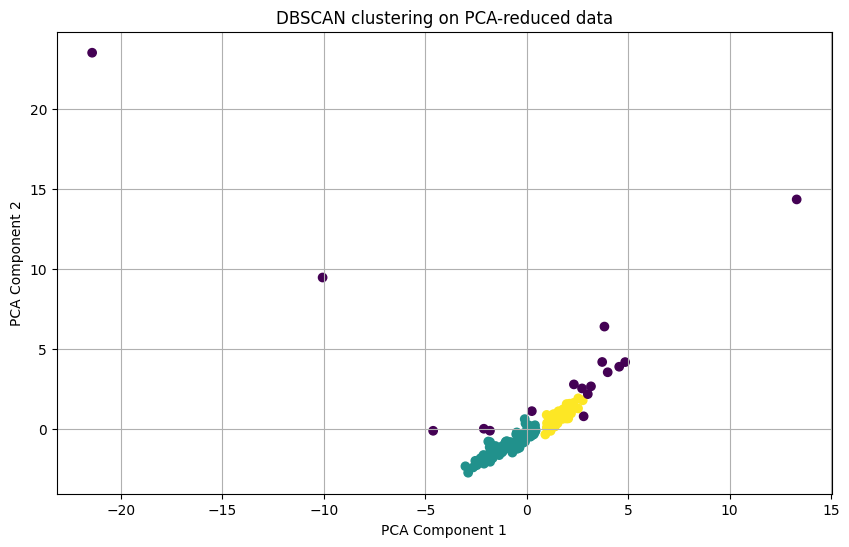

In [48]:
# Aplicar DBSCAN a los componentes principales
db = DBSCAN(eps=0.5, min_samples=5).fit(X_pca)

# Agregar etiquetas al DataFrame original
df_imputed['cluster'] = db.labels_

# Contar el número de puntos en cada cluster
cluster_counts = df_imputed['cluster'].value_counts()

# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_imputed['cluster'], cmap='viridis', marker='o')
plt.title('DBSCAN clustering on PCA-reduced data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()